In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import RK45,solve_ivp

# Transforming between Cartesian and Spherical coordinates

## Please note this is restricted to:
$0 <= \theta <= \pi$

$-1/2\pi < \phi < 1/2\pi$

$\phi \neq 0$

In [24]:
# This only works for: 0 <= th <= pi and -1/2pi < phi < 1/2pi
def cartToSph(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    if r != 1:
        print("Warning cartToSph: (x, y, z) coordinates not on a sphere of radius 1")

    th = np.arccos(z/r) # z/r: [-1, 1] => acos:[pi, 0]
    if th < 0 or th > np.pi:
        print("Warning cartToSph: theta is not in the interval 0 <= th <= pi.")
    if z/r > 1 or z/r < -1:
        print("Warning cartToSph: z/r > 1 or z/r < -1")
    
    if x == 0:
        print("Warning cartToSph: x = 0, y/x not defined")
    ph = np.arctan(y/x) # y/x: all => atan: [-1/2pi, 1/2pi]
    if ph <= -1/2 * np.pi or ph >= 1/2 * np.pi:
        print("Warning cartToSph: phi is not in the interval -1/2pi < phi < 1/2pi.")

    return r, th, ph

In [72]:
def sphToCart(th, ph):
    if np.all(np.cos(iph) == 0 or np.sin(iph) == 0 for iph in ph):
        print("Warning sphToCart: at one or some phi values the transformation is not one-to-one")
    x = np.sin(th)*np.cos(ph)
    y = np.sin(th)*np.sin(ph)
    z = np.cos(th)
    
    return x, y, z

In [18]:
def gamThPhPh(th):
    return -np.sin(th)*np.cos(th)

def gamPhPhTh(th):
    if th<=0:
        print("Warning gamPhPhTh: theta <= 0")
    elif th >= np.pi:
        print("Warning gamPhPhTh: theta >= pi")
        
    return np.cot(th)

In [69]:
def greatCircle(rot_x):
    l_ph = np.linspace(-1/2*np.pi+0.01, 1/2*np.pi-0.01, 20)
    l_th = np.full(len(l_ph), 1/2*np.pi)
    l_x, l_y, l_z = sphToCart(l_th, l_ph)
    
    # Rotate
    l_x_r = l_x
    l_y_r = np.cos(rot_x)*l_y - np.sin(rot_x)*l_z
    l_z_r = np.sin(rot_x)*l_y + np.cos(rot_x)*l_z

    return l_x_r, l_y_r, l_z_r

In [91]:
def getCurve(x_th_0 = 1/2*np.pi, x_ph_0 = 0, k_th_0 = 0.1, k_ph_0 = 1/np.sqrt(2), \
             curve_start = 0, curve_end = 1, nr_points_curve = 20
            ):

    def oneStep(lamb, U):
        #print(U)
        x_th, k_th, x_ph, k_ph = U
        dx_th = k_th
        dk_th = np.sin(x_th) * np.cos(x_th) * k_ph * k_ph
        dx_ph = k_ph
        dk_ph = -2/np.tan(x_th) * k_ph * k_th

        return [dx_th, dk_th, dx_ph, dk_ph]



    U_0 = [x_th_0, k_th_0, x_ph_0, k_ph_0]
    t_pts = np.linspace(curve_start, curve_end, nr_points_curve)
    result = solve_ivp(oneStep, (curve_start, curve_end), U_0, t_eval=t_pts)
    print(result.message)
    lamb_solution = result.t
    th_solution, U_th_solution, ph_solution, U_ph_solution = result.y
    
    print("Th", min(th_solution), max(th_solution), th_solution[0], th_solution[-1])
    print("Uth", min(U_th_solution), max(U_th_solution))
    print("Ph", min(ph_solution), max(ph_solution))
    print("Uph", min(U_ph_solution), max(U_ph_solution))
    
    
    x_line, y_line, z_line = sphToCart(th_solution, ph_solution)
#     x_line, y_line, z_line = [], [], []
#     for i in range(len(th_solution)):
#         L, V, B_th, B_ph = vectorInCart(U_th_solution[i], U_ph_solution[i], th_solution[i], ph_solution[i])
# #        print(L)
#         x_line.append(float(L["x"]))
#         y_line.append(float(L["y"]))
#         z_line.append(float(L["z"]))

    return x_line, y_line, z_line, th_solution, U_th_solution, ph_solution, U_ph_solution

Warning sphToCart: at one or some phi values the transformation is not one-to-one
Warning sphToCart: at one or some phi values the transformation is not one-to-one
Warning sphToCart: at one or some phi values the transformation is not one-to-one
The solver successfully reached the end of the integration interval.
Th 0.4165623194098641 2.72605777917276 0.7853981633974483 0.43605674797673705
Uth -0.7996046392400005 0.7899891240399965
Ph 0.7853981633974483 6.295922821408812
Uph 0.34847049503491356 2.159608245596437
Warning sphToCart: at one or some phi values the transformation is not one-to-one


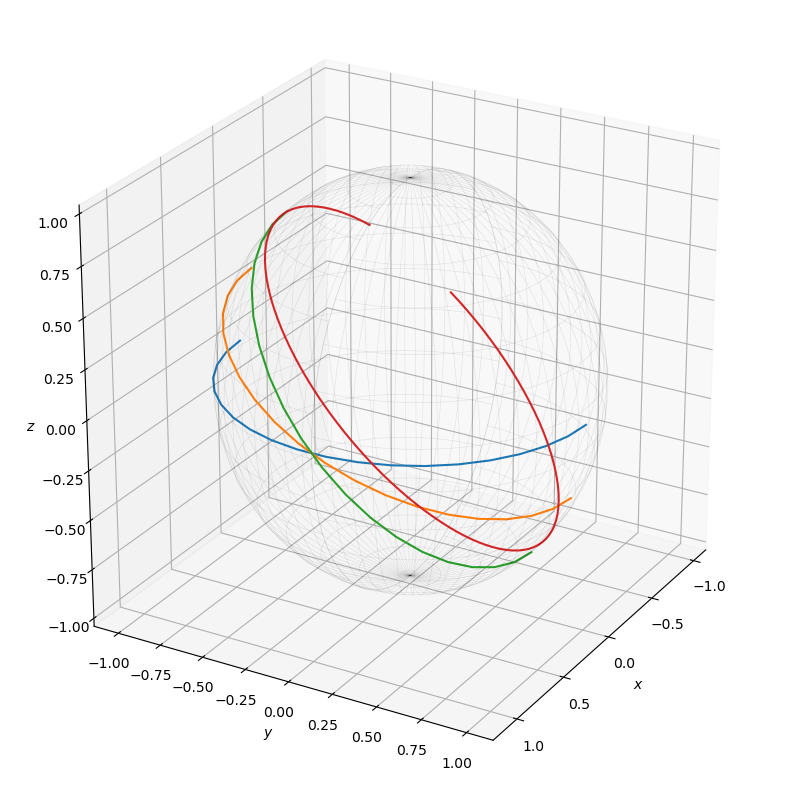

In [101]:
# We add a subplot to the figure which we tell to use the 3d projection 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
# We set the scaling of the axis to equal
ax.set_aspect("equal") 
# Lastly we set the viewing angle from which we want to view our 3d scene.
ax.view_init(elev=25, azim=30, roll=0)

# Using numpy we make a grid that we use to plot the wireframe
theta_w, phi_w =  np.mgrid[0:2*np.pi : 60j ,0:np.pi : 60j]

# We set the radius of the wireframe sphere to 1 and calculate
# the cartesian coordinates
# r_w = 1
x_w = np.sin(theta_w) * np.cos(phi_w) #func_x(r_w, theta_w, phi_w)
y_w = np.sin(theta_w) * np.sin(phi_w) #func_y(r_w, theta_w, phi_w)
z_w = np.cos(theta_w) #func_z(r_w, theta_w, phi_w)

# # We plot the wireframe
ax.plot_wireframe(x_w,y_w,z_w, colors= [0,0,0,0.08], linewidths=[0.5])

plt.xlim(-1.1, 1.2)
plt.ylim(-1.1, 1.1)
ax.set_zlim(-1, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

for r in [0, -1/8*np.pi, -1/4*np.pi]:
    x, y, z = greatCircle(r)
    ax.plot(x, y, z)
    
x_line, y_line, z_line, th_solution, U_th_solution, ph_solution, U_ph_solution = \
getCurve(x_th_0 = 1/4*np.pi, x_ph_0 = 1/4*np.pi, k_th_0 = 1/np.sqrt(2), k_ph_0 = 1/np.sqrt(2), \
        curve_end = 2.1*np.pi, nr_points_curve = 100)

ax.plot(x_line, y_line, z_line)